# Assignment 2 Regression technique 
Name: Amina Shaikh <br>
Roll No. 3369

Download temperature data from below link.<br> https://www.kaggle.com/venky73/temperatures-of-india?select=temperatures.csv

This data consists of temperatures of INDIA averaging the temperatures of all places month wise. Temperatures values are recorded in CELSIUS <br>
a. Apply Linear Regression using suitable library function and predict the Month-wise temperature. <br>
b. Assess the performance of regression models using MSE, MAE and R-Square metrics <br>
c. Visualize simple regression model. <br>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
dataFrame=pd.read_csv('temperatures.csv')     #using pandas to read the data
dataFrame

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [42]:
dataFrame.shape                               #tells the number of rows and columns of a given DataFrame

(117, 18)

In [43]:
dataFrame.head()                             #to return top n rows of dataframe (default=5)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [44]:
dataFrame.describe()  

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [45]:
desc = dataFrame["JAN"].describe()
desc.loc[['mean']]

mean    23.687436
Name: JAN, dtype: float64

In [46]:
(dataFrame ==0).sum(axis=0)                 #displays total no of zeros for each col

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

<AxesSubplot:>

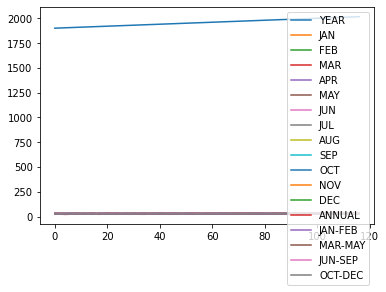

In [47]:
dataFrame.plot()                          #plotting a dataframe

In [48]:
top_5_data =dataFrame.nlargest(5,"JAN")
plt.figure(figsize=(14,12))

<Figure size 1008x864 with 0 Axes>

<Figure size 1008x864 with 0 Axes>

<AxesSubplot:title={'center':'Top 5 Records'}, xlabel='YEAR', ylabel='JAN'>

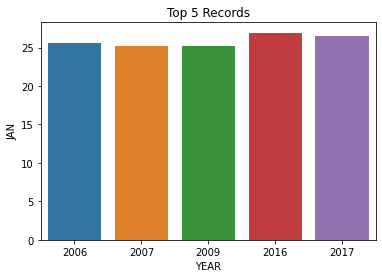

In [49]:
plt.title("Top 5 Records")
sns.barplot(x=top_5_data.YEAR,y=top_5_data.JAN)                #barplot for data visualisation

In [50]:
dataFrame.nlargest(6,"JAN")                   #to get n largest values from a data frame


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03
116,2017,26.45,29.46,31.60,34.95,35.84,33.82,31.88,31.72,32.22,32.29,29.60,27.18,31.42,27.95,34.13,32.41,29.69
105,2006,25.66,29.33,29.56,32.59,34.09,32.65,31.59,30.76,30.57,30.46,27.61,25.27,30.06,27.44,32.08,31.39,27.78
108,2009,25.27,27.75,30.57,33.09,34.09,33.73,31.77,31.84,31.60,30.75,27.59,25.53,30.30,26.51,32.57,32.24,27.96
106,2007,25.19,26.28,29.33,33.57,34.05,32.63,31.29,31.06,30.64,30.49,28.41,25.19,29.84,25.73,32.32,31.40,28.03
95,1996,25.18,27.40,30.86,32.40,33.69,32.50,31.19,30.23,30.86,29.44,27.61,24.83,29.58,26.30,32.07,31.19,27.29


In [51]:
dataFrame.nsmallest(6,"JAN")             #to get n smallest values from a data frame 


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
17,1918,22.06,25.08,27.95,30.68,33.37,31.82,31.78,30.56,30.27,30.06,26.95,23.32,28.66,23.57,30.68,31.10,26.78
5,1906,22.28,23.69,27.31,31.93,34.11,32.19,31.01,30.30,29.92,29.55,27.60,24.72,28.73,23.03,31.11,30.86,27.29
34,1935,22.28,25.93,29.09,30.24,34.24,33.07,30.63,29.81,29.89,29.56,26.88,24.20,28.76,23.41,31.15,30.85,26.88
44,1945,22.38,25.33,29.11,30.89,33.61,33.63,31.08,30.66,30.55,29.42,27.08,23.96,28.97,23.86,31.19,31.48,26.82
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25


Text(0, 0.5, 'Temperature in degree celsius')

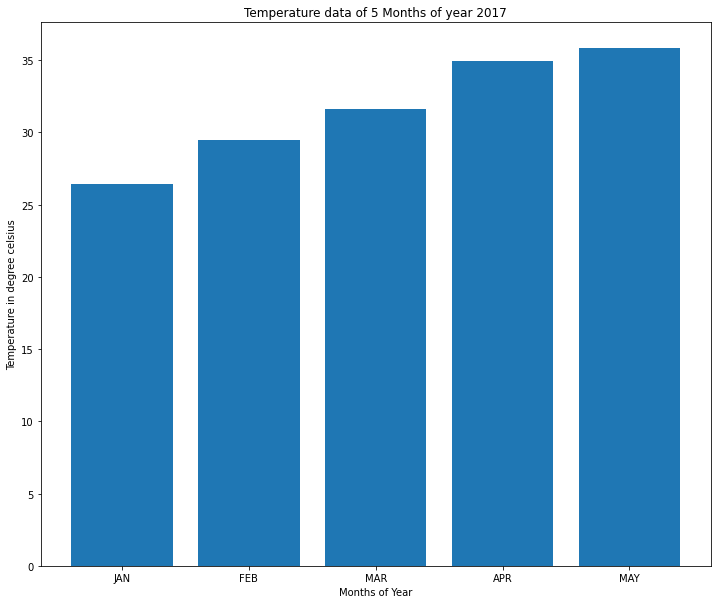

In [52]:
data_2017 = dataFrame[dataFrame["YEAR"]==2017]
xticks =np.array(data_2017[["JAN","FEB","MAR","APR","MAY"]].values)
yticks=["JAN","FEB","MAR","APR","MAY"]

plt.figure(figsize=(12,10))
plt.bar(yticks,xticks[0])

plt.title("Temperature data of 5 Months of year 2017")
plt.xlabel("Months of Year")
plt.ylabel("Temperature in degree celsius")

In [53]:
from sklearn import linear_model
dataFrame.columns


Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

In [54]:
# Split the dataset into training and testing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
X=dataFrame[["YEAR"]]
Y=dataFrame[["JAN"]]

X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape ) 

lr = LinearRegression()                   # instantiate the model
lr.fit(X_train, Y_train)                  # fit the model

#predicting the target value from the model for the samples

Y_test_lr=lr.predict(X_test)            
Y_train_lr=lr.predict(X_train)
Y_train, X_train



(93, 1) (24, 1)


(       JAN
 15   24.13
 69   24.19
 31   24.13
 24   22.56
 56   22.98
 ..     ...
 106  25.19
 14   22.60
 92   23.82
 51   23.91
 102  24.27
 
 [93 rows x 1 columns],
      YEAR
 15   1916
 69   1970
 31   1932
 24   1925
 56   1957
 ..    ...
 106  2007
 14   1915
 92   1993
 51   1952
 102  2003
 
 [93 rows x 1 columns])

In [56]:
lr.coef_

array([[0.01206848]])

In [57]:
Y_test_lr

array([[23.51407809],
       [23.03133884],
       [23.62269442],
       [23.48994113],
       [23.10374972],
       [24.00888582],
       [23.85199557],
       [24.11750215],
       [23.41753024],
       [23.11581821],
       [23.46580416],
       [23.29684543],
       [24.12957064],
       [24.23818697],
       [23.20029758],
       [22.98306491],
       [23.73131075],
       [24.33473482],
       [23.90026949],
       [24.20198152],
       [23.80372164],
       [24.05715975],
       [24.37094026],
       [23.12788669]])

In [58]:
Y_train_lr

array([[23.16409213],
       [23.81579012],
       [23.35718783],
       [23.27270846],
       [23.65889986],
       [23.2485715 ],
       [24.32266634],
       [23.7675162 ],
       [23.94854342],
       [23.34511935],
       [23.86406405],
       [23.55028353],
       [23.09168124],
       [23.38132479],
       [24.31059785],
       [23.79165316],
       [23.32098239],
       [23.52614657],
       [23.98474886],
       [23.04340732],
       [23.99681734],
       [23.77958468],
       [23.45373568],
       [23.40546176],
       [23.17616061],
       [23.75544771],
       [23.39339328],
       [23.64683138],
       [23.06754428],
       [23.50200961],
       [23.8278586 ],
       [23.91233797],
       [23.30891391],
       [23.21236606],
       [24.10543367],
       [24.16577608],
       [23.28477694],
       [23.07961276],
       [24.14163912],
       [23.5744205 ],
       [23.13995517],
       [24.27439241],
       [23.01927036],
       [23.18822909],
       [23.4416672 ],
       [24

In [59]:
import warnings
warnings.filterwarnings('ignore')

lr.predict([[2016]])

array([[24.37094026]])

In [60]:
Y_pred=lr.predict(X_test)
Y_pred


array([[23.51407809],
       [23.03133884],
       [23.62269442],
       [23.48994113],
       [23.10374972],
       [24.00888582],
       [23.85199557],
       [24.11750215],
       [23.41753024],
       [23.11581821],
       [23.46580416],
       [23.29684543],
       [24.12957064],
       [24.23818697],
       [23.20029758],
       [22.98306491],
       [23.73131075],
       [24.33473482],
       [23.90026949],
       [24.20198152],
       [23.80372164],
       [24.05715975],
       [24.37094026],
       [23.12788669]])

In [61]:
print("Intercept",lr.intercept_)
print("Slope",lr.coef_)

Intercept [0.04088196]
Slope [[0.01206848]]


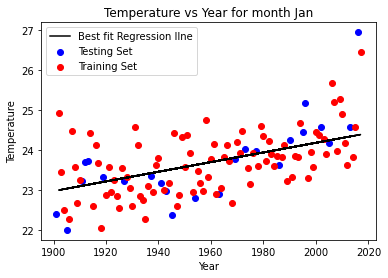

In [64]:
# Visualization

plt.scatter(X_test,Y_test,color = 'blue')
plt.scatter(X_train,Y_train,color = 'red')
plt.plot(X_train,lr.predict(X_train), color = 'black');
plt.legend(['Best fit Regression lIne','Testing Set','Training Set'])
plt.title('Temperature vs Year for month Jan')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show();

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Errors for month Jan

print('R-Squared Errror : ',r2_score(Y_test,Y_test_lr))
print('Mean Absolute Error : ',mean_absolute_error(Y_test,Y_test_lr))
print('Mean Squared Error : ',mean_squared_error(Y_test,Y_test_lr))

R-Squared Errror :  0.4601171648515957
Mean Absolute Error :  0.5083956669577453
Mean Squared Error :  0.5567563295289465


In [53]:
# mean absolute error
np.mean(abs(Y_test - Y_test_lr))

JAN    0.508396
dtype: float64

In [54]:
# mean squared error
np.mean((Y_test - Y_test_lr)**2)

JAN    0.556756
dtype: float64

In [59]:
lr.score(X_test, Y_test)

0.4601171648515957